# TP 2 - algoritmos de ensambles 

## Cargar librerias


In [1]:
import datetime
import IPython
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time
from matplotlib import pyplot
from numpy import mean
from numpy import std
from urllib.parse import urlparse

In [2]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [50]:
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn.calibration import calibration_curve
from sklearn.impute import KNNImputer
from sklearn.feature_selection import RFE
from sklearn.metrics import (
    roc_curve,
    make_scorer,
    accuracy_score,
    fbeta_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
)
from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    StratifiedKFold,
    KFold,
    GridSearchCV,
    RandomizedSearchCV,
    RepeatedStratifiedKFold,
)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
import pickle
from sklearn.model_selection import LeaveOneGroupOut

from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import KFold, cross_val_score

## Cargar dataset

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
df_original = pd.read_csv("01.df.procesado_ComParE_2016_v2")
df_original.head()

,Unnamed: 0,file_path,start,end,audspec_lengthL1norm_sma_range,audspec_lengthL1norm_sma_maxPos,audspec_lengthL1norm_sma_minPos,audspec_lengthL1norm_sma_quartile1,audspec_lengthL1norm_sma_quartile2,audspec_lengthL1norm_sma_quartile3,audspec_lengthL1norm_sma_iqr1-2,audspec_lengthL1norm_sma_iqr2-3,audspec_lengthL1norm_sma_iqr1-3,audspec_lengthL1norm_sma_percentile1.0,audspec_lengthL1norm_sma_percentile99.0,audspec_lengthL1norm_sma_pctlrange0-1,audspec_lengthL1norm_sma_stddev,audspec_lengthL1norm_sma_skewness,audspec_lengthL1norm_sma_kurtosis,audspec_lengthL1norm_sma_meanSegLen,audspec_lengthL1norm_sma_maxSegLen,audspec_lengthL1norm_sma_minSegLen,audspec_lengthL1norm_sma_segLenStddev,audspec_lengthL1norm_sma_upleveltime25,audspec_lengthL1norm_sma_upleveltime50,audspec_lengthL1norm_sma_upleveltime75,audspec_lengthL1norm_sma_upleveltime90,audspec_lengthL1norm_sma_risetime,audspec_lengthL1norm_sma_leftctime,audspec_lengthL1norm_sma_lpgain,audspec_lengthL1norm_sma_lpc0,audspec_lengthL1norm_sma_lpc1,audspec_lengthL1norm_sma_lpc2,audspec_lengthL1norm_sma_lpc3,audspec_lengthL1norm_sma_lpc4,audspecRasta_lengthL1norm_sma_range,audspecRasta_lengthL1norm_sma_maxPos,audspecRasta_lengthL1norm_sma_minPos,audspecRasta_lengthL1norm_sma_quartile1,audspecRasta_lengthL1norm_sma_quartile2,...,mfcc_sma_de[12]_peakRangeAbs,mfcc_sma_de[12]_peakRangeRel,mfcc_sma_de[12]_peakMeanAbs,mfcc_sma_de[12]_peakMeanMeanDist,mfcc_sma_de[12]_peakMeanRel,mfcc_sma_de[12]_minRangeRel,mfcc_sma_de[12]_meanRisingSlope,mfcc_sma_de[12]_stddevRisingSlope,mfcc_sma_de[12]_meanFallingSlope,mfcc_sma_de[12]_stddevFallingSlope,mfcc_sma_de[13]_flatness,mfcc_sma_de[13]_posamean,mfcc_sma_de[13]_rqmean,mfcc_sma_de[13]_meanPeakDist,mfcc_sma_de[13]_peakDistStddev,mfcc_sma_de[13]_peakRangeAbs,mfcc_sma_de[13]_peakRangeRel,mfcc_sma_de[13]_peakMeanAbs,mfcc_sma_de[13]_peakMeanMeanDist,mfcc_sma_de[13]_peakMeanRel,mfcc_sma_de[13]_minRangeRel,mfcc_sma_de[13]_meanRisingSlope,mfcc_sma_de[13]_stddevRisingSlope,mfcc_sma_de[13]_meanFallingSlope,mfcc_sma_de[13]_stddevFallingSlope,mfcc_sma_de[14]_flatness,mfcc_sma_de[14]_posamean,mfcc_sma_de[14]_rqmean,mfcc_sma_de[14]_meanPeakDist,mfcc_sma_de[14]_peakDistStddev,mfcc_sma_de[14]_peakRangeAbs,mfcc_sma_de[14]_peakRangeRel,mfcc_sma_de[14]_peakMeanAbs,mfcc_sma_de[14]_peakMeanMeanDist,mfcc_sma_de[14]_peakMeanRel,mfcc_sma_de[14]_minRangeRel,mfcc_sma_de[14]_meanRisingSlope,mfcc_sma_de[14]_stddevRisingSlope,mfcc_sma_de[14]_meanFallingSlope,mfcc_sma_de[14]_stddevFallingSlope
0,0,./audios/ravdess/Actor_06/03-01-02-02-02-01-06...,0 days 00:00:00,0 days 00:00:04.337666667,0.385139,0.281690,0.157277,0.018544,0.073291,0.141342,0.054748,0.068050,0.122798,0.001566,0.380662,0.379096,0.092890,1.253359,4.064508,0.212143,1.00,0.04,0.244954,0.377934,0.143192,0.056338,0.025822,0.411765,0.502359,0.000037,-2.058310,1.372526,-0.150972,-0.332653,0.174161,10.910065,0.239437,0.082160,0.718406,0.921556,...,8.972507,0.620551,2.631954,2.640661,-19.968447,0.481643,122.25435,65.50301,117.171455,69.567940,0.621317,1.734314,2.056581,0.093636,0.051303,8.029305,0.630751,2.506547,2.509608,-19.999660,0.384439,110.650150,55.920498,125.65294,59.555850,0.637156,1.355939,1.775243,0.100244,0.056494,4.823022,0.401732,2.090931,2.099112,-19.944317,0.746226,102.882890,61.312977,94.09890,66.808334
1,0,./audios/ravdess/Actor_06/03-01-01-01-01-01-06...,0 days 00:00:00,0 days 00:00:03.336666667,0.561725,0.460123,0.000000,0.009667,0.016030,0.166888,0.006363,0.150858,0.157221,0.001034,0.552220,0.551186,0.141673,1.604316,4.845200,0.131667,1.05,0.03,0.228260,0.294479,0.119632,0.064417,0.030675,0.467692,0.533951,0.000130,-2.295715,1.813215,-0.372475,-0.262789,0.128072,13.250631,0.319018,0.769939,0.703309,0.965247,...,6.137990,0.450112,2.395603,2.384938,19.916440,0.597728,124.46933,54.42364,127.230690,66.106865,0.589067,1.451701,1.927301,0.084865,0.045942,6.854512,0.583690,2.263183,2.273793,-19.902369,0.556142,118.504974,65.344200,115.50763,52.736790,0.610936,1.377818,1.803609,0.100968,0.055163,6.337922,0.53133

In [30]:
df_1 = pd.read_csv("https://raw.githubusercontent.com/blukitas/AA-2021/main/TPs/02.TP/01.df.procesado.csv")

In [31]:
df_original.shape

(2452, 6377)

In [32]:
num_columns = [col for col in df_original.columns if df_original[col].dtype != "object"]
num_columns

['Unnamed: 0',
 'audspec_lengthL1norm_sma_range',
 'audspec_lengthL1norm_sma_maxPos',
 'audspec_lengthL1norm_sma_minPos',
 'audspec_lengthL1norm_sma_quartile1',
 'audspec_lengthL1norm_sma_quartile2',
 'audspec_lengthL1norm_sma_quartile3',
 'audspec_lengthL1norm_sma_iqr1-2',
 'audspec_lengthL1norm_sma_iqr2-3',
 'audspec_lengthL1norm_sma_iqr1-3',
 'audspec_lengthL1norm_sma_percentile1.0',
 'audspec_lengthL1norm_sma_percentile99.0',
 'audspec_lengthL1norm_sma_pctlrange0-1',
 'audspec_lengthL1norm_sma_stddev',
 'audspec_lengthL1norm_sma_skewness',
 'audspec_lengthL1norm_sma_kurtosis',
 'audspec_lengthL1norm_sma_meanSegLen',
 'audspec_lengthL1norm_sma_maxSegLen',
 'audspec_lengthL1norm_sma_minSegLen',
 'audspec_lengthL1norm_sma_segLenStddev',
 'audspec_lengthL1norm_sma_upleveltime25',
 'audspec_lengthL1norm_sma_upleveltime50',
 'audspec_lengthL1norm_sma_upleveltime75',
 'audspec_lengthL1norm_sma_upleveltime90',
 'audspec_lengthL1norm_sma_risetime',
 'audspec_lengthL1norm_sma_leftctime',
 'a

In [33]:
drop_columns = [
    "file_path",
    "Unnamed: 0",
    "modality",
    "vocal_channel",
#     "emotion",
    "emotional_intensity",
    "statement",
    "repetition",
    "actor",
]
num_columns = [x for x in num_columns if x not in drop_columns]
num_columns

['audspec_lengthL1norm_sma_range',
 'audspec_lengthL1norm_sma_maxPos',
 'audspec_lengthL1norm_sma_minPos',
 'audspec_lengthL1norm_sma_quartile1',
 'audspec_lengthL1norm_sma_quartile2',
 'audspec_lengthL1norm_sma_quartile3',
 'audspec_lengthL1norm_sma_iqr1-2',
 'audspec_lengthL1norm_sma_iqr2-3',
 'audspec_lengthL1norm_sma_iqr1-3',
 'audspec_lengthL1norm_sma_percentile1.0',
 'audspec_lengthL1norm_sma_percentile99.0',
 'audspec_lengthL1norm_sma_pctlrange0-1',
 'audspec_lengthL1norm_sma_stddev',
 'audspec_lengthL1norm_sma_skewness',
 'audspec_lengthL1norm_sma_kurtosis',
 'audspec_lengthL1norm_sma_meanSegLen',
 'audspec_lengthL1norm_sma_maxSegLen',
 'audspec_lengthL1norm_sma_minSegLen',
 'audspec_lengthL1norm_sma_segLenStddev',
 'audspec_lengthL1norm_sma_upleveltime25',
 'audspec_lengthL1norm_sma_upleveltime50',
 'audspec_lengthL1norm_sma_upleveltime75',
 'audspec_lengthL1norm_sma_upleveltime90',
 'audspec_lengthL1norm_sma_risetime',
 'audspec_lengthL1norm_sma_leftctime',
 'audspec_lengthL1

In [34]:
df_proc = df_original[num_columns] #.head(10000)

## Split del dataset

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_proc.loc[:, df_proc.columns != "emotion"],
    df_1["emotion"],
    stratify=df_1["emotion"],
    random_state=66,
)

### Check de nulos

In [37]:
df_proc.isnull().mean() * 100

audspec_lengthL1norm_sma_range        0.0
audspec_lengthL1norm_sma_maxPos       0.0
audspec_lengthL1norm_sma_minPos       0.0
audspec_lengthL1norm_sma_quartile1    0.0
audspec_lengthL1norm_sma_quartile2    0.0
                                     ... 
mfcc_sma_de[14]_minRangeRel           0.0
mfcc_sma_de[14]_meanRisingSlope       0.0
mfcc_sma_de[14]_stddevRisingSlope     0.0
mfcc_sma_de[14]_meanFallingSlope      0.0
mfcc_sma_de[14]_stddevFallingSlope    0.0
Length: 6373, dtype: float64

In [38]:
df_proc.audspec_lengthL1norm_sma_range.isna().value_counts()

False    2452
Name: audspec_lengthL1norm_sma_range, dtype: int64

In [40]:
percent_missing = df_proc.isnull().sum() * 100 / len(df_proc)
missing_value_df = pd.DataFrame({'column_name': df_proc.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
audspec_lengthL1norm_sma_range,audspec_lengthL1norm_sma_range,0.0
audspec_lengthL1norm_sma_maxPos,audspec_lengthL1norm_sma_maxPos,0.0
audspec_lengthL1norm_sma_minPos,audspec_lengthL1norm_sma_minPos,0.0
audspec_lengthL1norm_sma_quartile1,audspec_lengthL1norm_sma_quartile1,0.0
audspec_lengthL1norm_sma_quartile2,audspec_lengthL1norm_sma_quartile2,0.0
...,...,...
mfcc_sma_de[14]_minRangeRel,mfcc_sma_de[14]_minRangeRel,0.0
mfcc_sma_de[14]_meanRisingSlope,mfcc_sma_de[14]_meanRisingSlope,0.0
mfcc_sma_de[14]_stddevRisingSlope,mfcc_sma_de[14]_stddevRisingSlope,0.0
mfcc_sma_de[14]_meanFallingSlope,mfcc_sma_de[14]_meanFallingSlope,0.0


In [41]:
df_proc.dropna()

,audspec_lengthL1norm_sma_range,audspec_lengthL1norm_sma_maxPos,audspec_lengthL1norm_sma_minPos,audspec_lengthL1norm_sma_quartile1,audspec_lengthL1norm_sma_quartile2,audspec_lengthL1norm_sma_quartile3,audspec_lengthL1norm_sma_iqr1-2,audspec_lengthL1norm_sma_iqr2-3,audspec_lengthL1norm_sma_iqr1-3,audspec_lengthL1norm_sma_percentile1.0,audspec_lengthL1norm_sma_percentile99.0,audspec_lengthL1norm_sma_pctlrange0-1,audspec_lengthL1norm_sma_stddev,audspec_lengthL1norm_sma_skewness,audspec_lengthL1norm_sma_kurtosis,audspec_lengthL1norm_sma_meanSegLen,audspec_lengthL1norm_sma_maxSegLen,audspec_lengthL1norm_sma_minSegLen,audspec_lengthL1norm_sma_segLenStddev,audspec_lengthL1norm_sma_upleveltime25,audspec_lengthL1norm_sma_upleveltime50,audspec_lengthL1norm_sma_upleveltime75,audspec_lengthL1norm_sma_upleveltime90,audspec_lengthL1norm_sma_risetime,audspec_lengthL1norm_sma_leftctime,audspec_lengthL1norm_sma_lpgain,audspec_lengthL1norm_sma_lpc0,audspec_lengthL1norm_sma_lpc1,audspec_lengthL1norm_sma_lpc2,audspec_lengthL1norm_sma_lpc3,audspec_lengthL1norm_sma_lpc4,audspecRasta_lengthL1norm_sma_range,audspecRasta_lengthL1norm_sma_maxPos,audspecRasta_lengthL1norm_sma_minPos,audspecRasta_lengthL1norm_sma_quartile1,audspecRasta_lengthL1norm_sma_quartile2,audspecRasta_lengthL1norm_sma_quartile3,audspecRasta_lengthL1norm_sma_iqr1-2,audspecRasta_lengthL1norm_sma_iqr2-3,audspecRasta_lengthL1norm_sma_iqr1-3,...,mfcc_sma_de[12]_peakRangeAbs,mfcc_sma_de[12]_peakRangeRel,mfcc_sma_de[12]_peakMeanAbs,mfcc_sma_de[12]_peakMeanMeanDist,mfcc_sma_de[12]_peakMeanRel,mfcc_sma_de[12]_minRangeRel,mfcc_sma_de[12]_meanRisingSlope,mfcc_sma_de[12]_stddevRisingSlope,mfcc_sma_de[12]_meanFallingSlope,mfcc_sma_de[12]_stddevFallingSlope,mfcc_sma_de[13]_flatness,mfcc_sma_de[13]_posamean,mfcc_sma_de[13]_rqmean,mfcc_sma_de[13]_meanPeakDist,mfcc_sma_de[13]_peakDistStddev,mfcc_sma_de[13]_peakRangeAbs,mfcc_sma_de[13]_peakRangeRel,mfcc_sma_de[13]_peakMeanAbs,mfcc_sma_de[13]_peakMeanMeanDist,mfcc_sma_de[13]_peakMeanRel,mfcc_sma_de[13]_minRangeRel,mfcc_sma_de[13]_meanRisingSlope,mfcc_sma_de[13]_stddevRisingSlope,mfcc_sma_de[13]_meanFallingSlope,mfcc_sma_de[13]_stddevFallingSlope,mfcc_sma_de[14]_flatness,mfcc_sma_de[14]_posamean,mfcc_sma_de[14]_rqmean,mfcc_sma_de[14]_meanPeakDist,mfcc_sma_de[14]_peakDistStddev,mfcc_sma_de[14]_peakRangeAbs,mfcc_sma_de[14]_peakRangeRel,mfcc_sma_de[14]_peakMeanAbs,mfcc_sma_de[14]_peakMeanMeanDist,mfcc_sma_de[14]_peakMeanRel,mfcc_sma_de[14]_minRangeRel,mfcc_sma_de[14]_meanRisingSlope,mfcc_sma_de[14]_stddevRisingSlope,mfcc_sma_de[14]_meanFallingSlope,mfcc_sma_de[14]_stddevFallingSlope
0,0.385139,0.281690,0.157277,0.018544,0.073291,0.141342,0.054748,0.068050,0.122798,0.001566,0.380662,0.379096,0.092890,1.253359,4.064508,0.212143,1.00,0.04,0.244954,0.377934,0.143192,0.056338,0.025822,0.411765,0.502359,0.000037,-2.058310,1.372526,-0.150972,-0.332653,0.174161,10.910065,0.239437,0.082160,0.718406,0.921556,1.355526,0.203150,0.433969,0.637120,...,8.972507,0.620551,2.631954,2.640661,-19.968447,0.481643,122.254350,65.503010,117.171455,69.567940,0.621317,1.734314,2.056581,0.093636,0.051303,8.029305,0.630751,2.506547,2.509608,-19.999660,0.384439,110.650150,55.920498,125.65294,59.555850,0.637156,1.355939,1.775243,0.100244,0.056494,4.823022,0.401732,2.090931,2.099112,-19.944317,0.746226,102.882890,61.312977,94.098900,66.808334
1,0.561725,0.460123,0.000000,0.009667,0.016030,0.166888,0.006363,0.150858,0.157221,0.001034,0.552220,0.551186,0.141673,1.604316,4.845200,0.131667,1.05,0.03,0.228260,0.294479,0.119632,0.064417,0.030675,0.467692,0.533951,0.000130,-2.295715,1.813215,-0.372475,-0.262789,0.128072,13.250631,0.319018,0.769939,0.703309,0.965247,1.748928,0.261938,0.783681,1.045619,...,6.137990,0.450112,2.395603,2.384938,19.916440,0.597728,124.469330,54.423640,127.230690,66.106865,0.589067,1.451701,1.927301,0.084865,0.045942,6.854512,0.583690,2.263183,2.273793,-19.902369,0.556142,118.504974,65.344200,115.50763,52.736790,0.610936,1.377818,1.803609,0.100968,0.055163,6.33792

### Método elegido



### Random Forests


In [43]:
from sklearn.ensemble import RandomForestClassifier

random_model = RandomForestClassifier(n_estimators=3050, bootstrap=True, random_state=42)
random_model.fit(X_train, y_train)

NameError: ignored

In [45]:
print("Accuracy training : {:.3f}".format(random_model.score(X_train, y_train)))
print("Accuracy test: {:.3f}".format(random_model.score(X_test, y_test)))

Accuracy training : 1.000
Accuracy test: 0.124


In [71]:
# df_proc.loc[:, df_proc.columns != "emotion"],
#     df_proc["emotion"],
    
importancia_predictores = pd.DataFrame(
    {"Predictor": df_proc.loc[:, df_proc.columns != "emotion"], "Importancia": random_model.feature_importances_}
)
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values("Importancia", ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,Predictor,Importancia
6113,"(p, c, m, _, f, f, t, M, a, g, _, s, p, e, c, ...",4.060654e-04
2946,"(p, c, m, _, f, f, t, M, a, g, _, s, p, e, c, ...",3.428569e-04
6259,"(m, f, c, c, _, s, m, a, _, d, e, [, 7, ], _, ...",3.351731e-04
3695,"(F, 0, f, i, n, a, l, _, s, m, a, _, l, p, c, 3)",3.308508e-04
6257,"(m, f, c, c, _, s, m, a, _, d, e, [, 7, ], _, ...",3.120557e-04
...,...,...
3859,"(l, o, g, H, N, R, _, s, m, a, _, m, i, n, P, ...",2.066085e-07
4042,"(j, i, t, t, e, r, D, D, P, _, s, m, a, _, d, ...",0.000000e+00
4003,"(j, i, t, t, e, r, L, o, c, a, l, _, s, m, a, ...",0.000000e+00
3874,"(l, o, g, H, N, R, _, s, m, a, _, p, e, r, c, ...",0.000000e+00


In [46]:
y_pred_test = random_model.predict(X_test)
y_pred_train = random_model.predict(X_train)
# evaluación
print("Accuracy training : {:.3f}".format(random_model.score(X_train, y_train)))
print("Accuracy test: {:.3f}".format(random_model.score(X_test, y_test)))
print("Train acc: {}".format(accuracy_score(y_train, y_pred_train)))
print("Test acc: {}".format(accuracy_score(y_test, y_pred_test)))
print("Test recall: {}".format(recall_score(y_test, y_pred_test, average='weighted')))
print("Test F1: {}".format(fbeta_score(y_test, y_pred_test, beta=1, average='weighted')))
print("Test F2: {}".format(fbeta_score(y_test, y_pred_test, beta=2, average='weighted')))

Accuracy training : 1.000
Accuracy test: 0.124
Train acc: 1.0
Test acc: 0.12398042414355628
Test recall: 0.12398042414355628
Test F1: 0.10646712381718561
Test F2: 0.11596674791620121


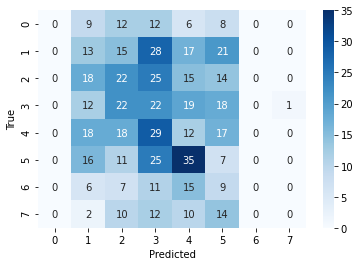

In [47]:
cm = confusion_matrix(y_test, y_pred_test)
matriz_n_aria = sns.heatmap(cm, cmap="Blues", annot=True, fmt="g")
plt.xlabel("Predicted")
plt.ylabel("True")


matriz_n_aria .figure.savefig(
    "03.04.Random_forest.matriz.png", bbox_inches='tight'
)

### AdaBoost

In [52]:
from sklearn.ensemble import AdaBoostClassifier

adaboost_model = AdaBoostClassifier(
    DecisionTreeClassifier(class_weight="balanced"),
    n_estimators=1640,
    learning_rate=0.707,
)

In [55]:
adaboost_model.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight='balanced',
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                 

clf.best_score_
0.4797936868934203 

clf.best_params_
{'n_estimators': 1640, 'learning_rate': 0.707}

In [56]:
# matriz de confusión y classification_report
y_pred_test = adaboost_model.predict(X_test)
y_pred_train = adaboost_model.predict(X_train)

# evaluación
print("Accuracy training : {:.3f}".format(adaboost_model.score(X_train, y_train)))
print("Accuracy test: {:.3f}".format(adaboost_model.score(X_test, y_test)))
print("Train acc: {}".format(accuracy_score(y_train, y_pred_train)))
print("Test acc: {}".format(accuracy_score(y_test, y_pred_test)))
print("Test recall: {}".format(recall_score(y_test, y_pred_test, average='weighted')))
print("Test F1: {}".format(fbeta_score(y_test, y_pred_test, beta=1, average='weighted')))
print("Test F2: {}".format(fbeta_score(y_test, y_pred_test, beta=2, average='weighted')))

Accuracy training : 1.000
Accuracy test: 0.127
Train acc: 1.0
Test acc: 0.1272430668841762
Test recall: 0.1272430668841762
Test F1: 0.1276760102136771
Test F2: 0.1272948538054718


Text(33.0, 0.5, 'True')

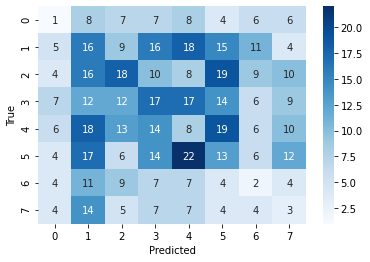

In [72]:
cm = confusion_matrix(y_test, y_pred_test)
matriz_n_aria = sns.heatmap(cm, cmap="Blues", annot=True, fmt="g")
plt.xlabel("Predicted")
plt.ylabel("True")